In [33]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV




In [34]:
path="../Wine Quality/winequality-white.csv"
whitedata=pd.read_csv(path,delimiter=';')
whitedata.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
whitedata.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [89]:
x=whitedata.drop('quality',axis=1)
y=whitedata['quality']

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(x_train)
X_test_scaled=scalar.transform(x_test)

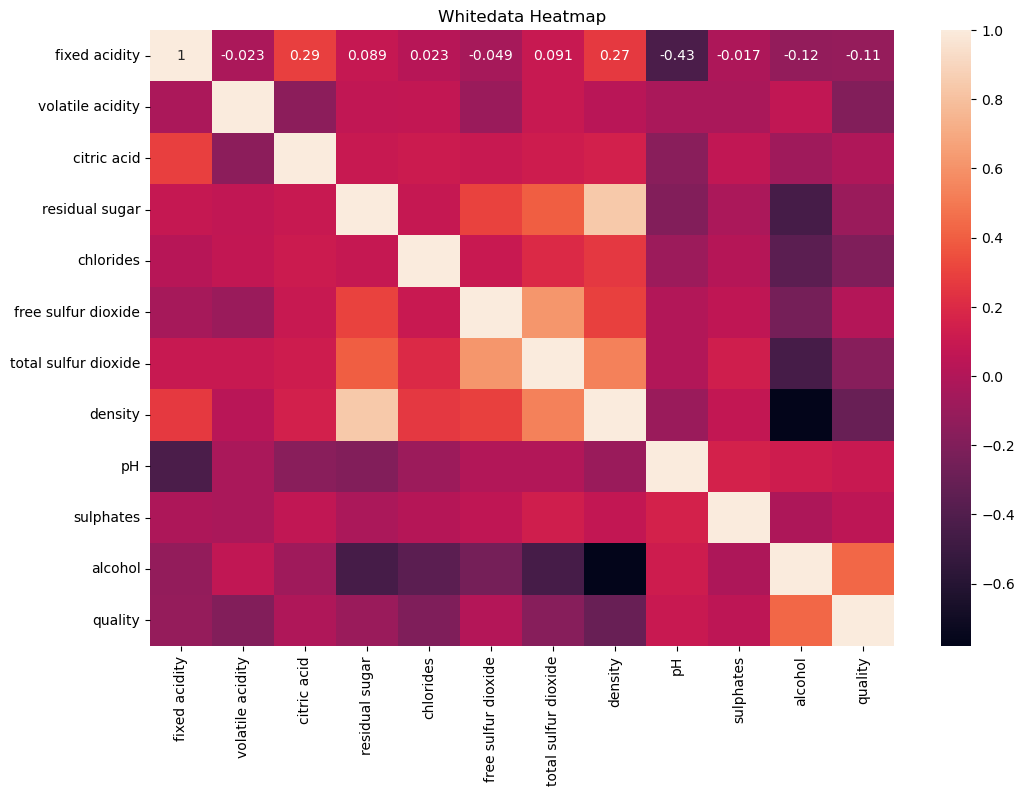

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(whitedata.corr(),annot=True)
plt.title("Whitedata Heatmap")
plt.show()

In [96]:
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [97]:
y_pred=model.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[  0   0   4   1   0   0]
 [  0   5  12   8   0   0]
 [  0   4 203  80   4   0]
 [  0   0  66 341  25   0]
 [  0   0   3  73 112   4]
 [  0   0   1  12   6  16]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.56      0.20      0.29        25
           5       0.70      0.70      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.58      0.45      0.49       980
weighted avg       0.69      0.69      0.68       980



C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
from sklearn.metrics import accuracy_score

initial_accuracy = accuracy_score(y_test, y_pred)
print(f'Initial accuracy: {initial_accuracy * 100:.2f}%')

Initial accuracy: 69.08%


In [99]:

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.6619898  0.66836735 0.66581633 0.64750958 0.65900383]
Average cross-validation score: 0.6605373758698881


In [100]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.6646193343237679


In [69]:
# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


[[  0   0   2   3   0   0]
 [  0   6  12   7   0   0]
 [  0   3 205  81   2   0]
 [  0   0  61 350  21   0]
 [  0   0   4  73 113   2]
 [  0   0   1  11   7  16]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.67      0.24      0.35        25
           5       0.72      0.70      0.71       291
           6       0.67      0.81      0.73       432
           7       0.79      0.59      0.67       192
           8       0.89      0.46      0.60        35

    accuracy                           0.70       980
   macro avg       0.62      0.47      0.51       980
weighted avg       0.71      0.70      0.70       980



C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:

improved_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Improved accuracy: {improved_accuracy * 100:.2f}%')

Improved accuracy: 70.41%


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Recursive Feature Elimination
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# PCA for dimensionality reduction
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Evaluate with RFE
model_rfe = RandomForestClassifier(random_state=42)
model_rfe.fit(X_train_rfe, y_train)
rfe_score = cross_val_score(model_rfe, X_test_rfe, y_test, cv=5).mean()

# Evaluate with PCA
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)
pca_score = cross_val_score(model_pca, X_test_pca, y_test, cv=5).mean()

print(f'RFE Model Score: {rfe_score * 100:.2f}%')
print(f'PCA Model Score: {pca_score * 100:.2f}%')

RFE Model Score: 53.37%
PCA Model Score: 52.35%


In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 1.0)
}

# Initialize model
model = GradientBoostingClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_scaled, y_train)

# Best model from random search
best_model = random_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test_scaled)
improved_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Improved accuracy with RandomizedSearchCV: {improved_accuracy * 100:.2f}%')


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\jai04\anaconda3\New folder\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "

Improved accuracy with RandomizedSearchCV: 68.47%


In [44]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Create an ensemble
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('gb', gb_model)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble model accuracy: {ensemble_accuracy * 100:.2f}%')


Ensemble model accuracy: 67.76%


In [49]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit the model with new features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_poly, y_train)

# Evaluate the model
y_pred_poly = model.predict(X_test_poly)
poly_accuracy = accuracy_score(y_test, y_pred_poly)
print(f'Accuracy with polynomial features: {poly_accuracy * 100:.2f}%')


Accuracy with polynomial features: 69.29%


In [51]:
!pip install xgboost
!pip install imbalanced-learn

In [52]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Create an ensemble
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('gb', gb_model), 
    ('xgb', xgb_model)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble model accuracy: {ensemble_accuracy * 100:.2f}%')


Ensemble model accuracy: 69.29%


In [53]:
# Initialize the model with class weights
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model
rf_model_weighted.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_weighted = rf_model_weighted.predict(X_test_scaled)
weighted_accuracy = accuracy_score(y_test, y_pred_weighted)
print(f'Weighted Random Forest model accuracy: {weighted_accuracy * 100:.2f}%')


Weighted Random Forest model accuracy: 70.61%


In [55]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the model
rf_model_poly = RandomForestClassifier(random_state=42)

# Fit the model with new features
rf_model_poly.fit(X_train_poly, y_train)

# Evaluate the model
y_pred_poly = rf_model_poly.predict(X_test_poly)
poly_accuracy = accuracy_score(y_test, y_pred_poly)
print(f'Accuracy with polynomial features: {poly_accuracy * 100:.2f}%')



Accuracy with polynomial features: 69.29%


In [58]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming your data is in a DataFrame called df and the target variable is 'quality'
# df = pd.read_csv('winequality-red.csv')

# Features and target
X = whitedata.drop('quality', axis=1)
y = whitedata['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data with fewer neighbors
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Create an ensemble
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('gb', gb_model), 
    ('xgb', xgb_model)
], voting='soft')

# Fit the ensemble model on SMOTE data
ensemble_model.fit(X_train_smote, y_train_smote)

# Evaluate the ensemble model
y_pred_ensemble_smote = ensemble_model.predict(X_test_scaled)
ensemble_smote_accuracy = accuracy_score(y_test, y_pred_ensemble_smote)
print(f'Ensemble model with SMOTE accuracy: {ensemble_smote_accuracy * 100:.2f}%')



Ensemble model with SMOTE accuracy: 65.92%
